In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def percentage_correct(df):
    return len(df[df['answered_correctly']==1])/len(df[df['answered_correctly']!=-1])

In [3]:
lectures = pd.read_csv('lectures.csv')
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [4]:
train = pd.read_pickle('riiid_train.pkl.gzip')
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,None
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [5]:
questions = pd.read_csv('questions.csv')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [6]:
len(train)

101230332

In [7]:
print(len(train[train['user_answer']==-1])/len(train))

0.019352223402764303


In [8]:
print(len(train[train['answered_correctly']==1])/len(train[train['answered_correctly']!=-1]))

0.6572355454194717


In [9]:
sample_user = train[train['user_id'] == 115]
sample_user.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,None
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


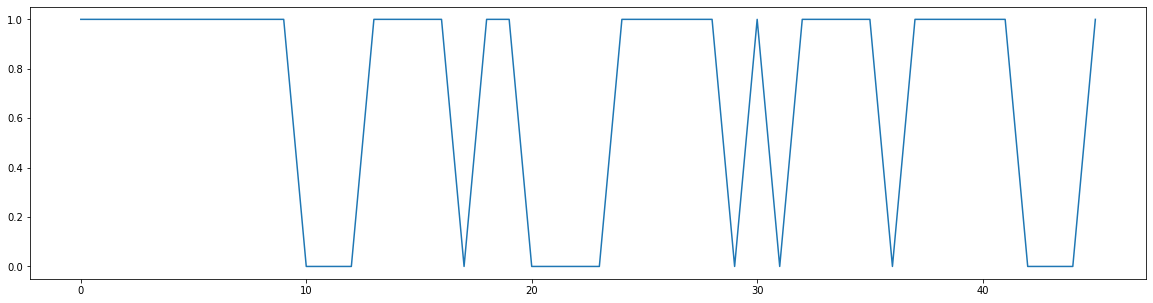

In [10]:
plt.figure(figsize=(20,5),edgecolor='black')
plt.plot(sample_user['answered_correctly'])
# plt.plot(sample_user['prior_question_elapsed_time']/60000)
# plt.plot(sample_user['prior_question_had_explanation'])

In [11]:
users = np.unique(train['user_id'])
print("Number of unique users == " + str(len(users)))

Number of unique users == 393656


In [12]:
unique_lecture_tags = lectures.tag.unique()
questions[questions.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [13]:
questions['tags'] = questions['tags'].astype(str)

tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'There are {len(tags)} different tags')

There are 188 different tags


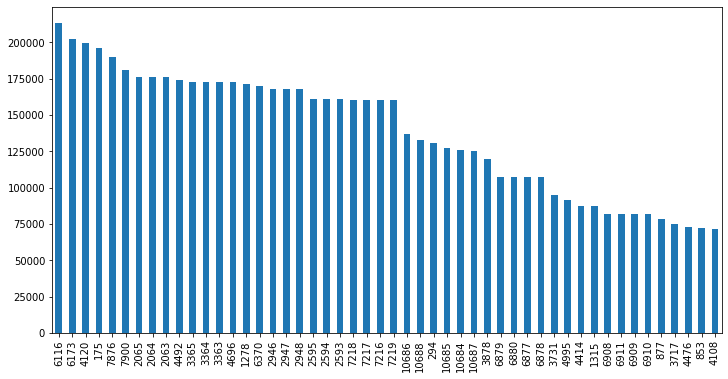

In [14]:
cids = train.content_id.value_counts()[:50]

fig = plt.figure(figsize=(12,6))
ax = cids.plot.bar()
# plt.title("Thirty most used content id's")
plt.xticks(rotation=90)
plt.show()

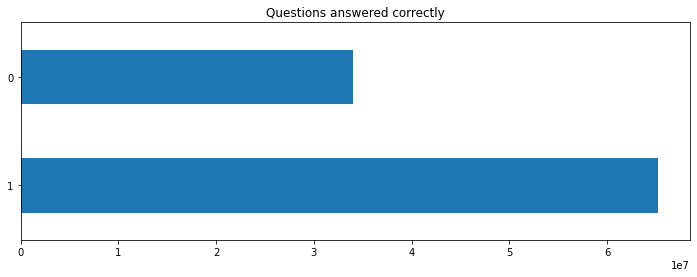

In [15]:
correct = train[train.answered_correctly != -1].answered_correctly.value_counts()

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
plt.title("Questions answered correctly")
plt.xticks(rotation=0)
plt.show()

In [16]:
users = train.groupby('user_id')

In [124]:
percentage_correct_per_user = []
for key, value in users:
    percentage_correct_per_user.append(percentage_correct(value))
percentage_correct(train)

0.6572355454194717

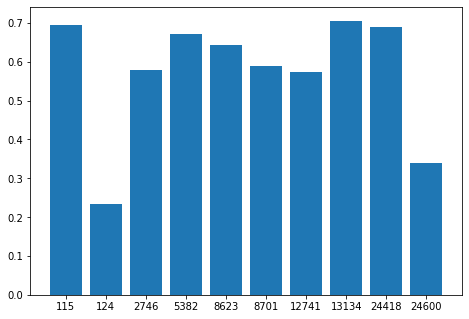

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = percentage_correct_per_user[:10]
x = np.unique(train['user_id'])[:10]
x = [str(s) for s in x]
ax.bar(x,y)
plt.show()


In [29]:
questions.nunique()

question_id       13523
bundle_id          9765
correct_answer        4
part                  7
tags               1520
dtype: int64

<BarContainer object of 10 artists>

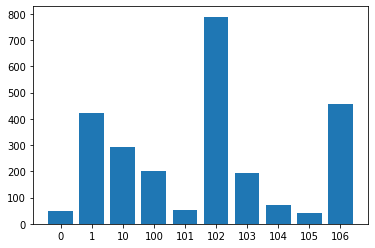

In [123]:
questions['tags'] = questions['tags'].astype(str)
tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
values, counts = np.unique(tags, return_counts=True)

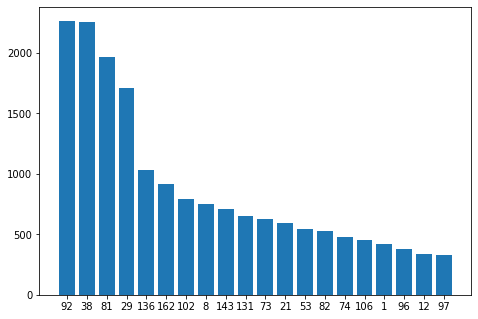

In [125]:
questions['tags'] = questions['tags'].astype(str)
tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
maps = pd.DataFrame(tags)
maps = maps.value_counts()
keys = [x for (x,) in maps.index.values]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = maps.values[:20]
x = keys[:20]
ax.bar(x,y)
plt.show()